<a href="https://colab.research.google.com/github/sophiabahar/Portfolio-Projects/blob/main/Happiness_Index_2018_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Happiness Index 2018-2019**

Author: Sophia Bahar Root

Date: 15/05/2023

Dataset Reference: https://www.kaggle.com/

**Overview of the Data (2018 & 2019):**
* Overall rank: List of ranks of different countries from 1 to 156
* Country or region: List of the names of different countries.
* Score: List of happiness scores of different countries.
* GDP per capita: The GDP per capita score of different countries.
* Social support: The social support of different countries.
* Healthy life expectancy: The healthy life expectancy of different countries.
* Freedom to make life choices: The score of perception of freedom of different countries.
* Generosity: Generosity (the quality of being kind and generous) score of different countries.
* Perceptions of corruption: The score of the perception of corruption in different countries.

Objectives: 
In my personal use of this dataset, I plan to answer the following questions. 
* Are there significant correlations between variables? If so, what are they?
* Which are the top 10 happiest countries? 
* Has happiness increased from 2018 to 2019? 

In [148]:
# Libraries
import numpy as np
from scipy import stats
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
#Access to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
#Find files
df_2018File = '/content/drive/MyDrive/Colab Notebooks/Happiness Index 2018-2019/archive/2018.csv'
df_2019File = '/content/drive/MyDrive/Colab Notebooks/Happiness Index 2018-2019/archive/2019.csv'
df_report_2018_2019File = '/content/drive/MyDrive/Colab Notebooks/Happiness Index 2018-2019/archive/report_2018-2019.csv'

In [151]:
#Upload files
df_2018 = pd.read_csv(df_2018File)
df_2019 = pd.read_csv(df_2019File)
df_report_2018_2019 = pd.read_csv(df_report_2018_2019File)

In [152]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [153]:
#Describe
df_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112449
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096343
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.139000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


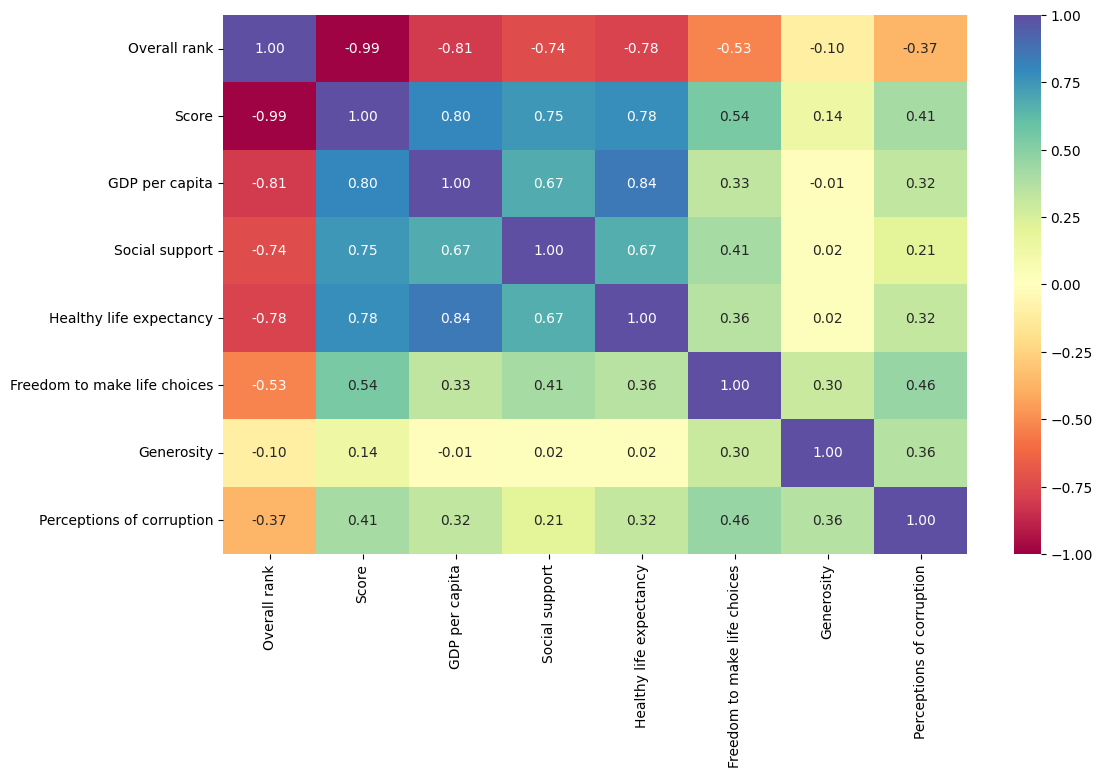

In [154]:
#Correlation Matrix for 2018 data

cols_list = df_2018.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df_2018[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Negative correlations for the 2018 data:**
* Overall rank negatively correlates with -0.50 and above with Score (-0.99), GDP per capita (-0.81), Social support (-0.74), Healthy life expectancy (-0.78), and Freedom to make life choices (-0.53).

**Positive correlations for the 2018 data:**
* Score positively correlates with 0.50 and above with GDP per capita (0.80), Social support (0.75), Healthy life expectancy (0.78),  and Freedom to make life choices (0.54). 
* GDP per capita correlates with 0.50 and above with Social support (0.67), and Healthy life expectancy (0.84).
* Social support correlates with 0.50 and above with Healthy life expectancy (0.67).


In [155]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [156]:
#Describe
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


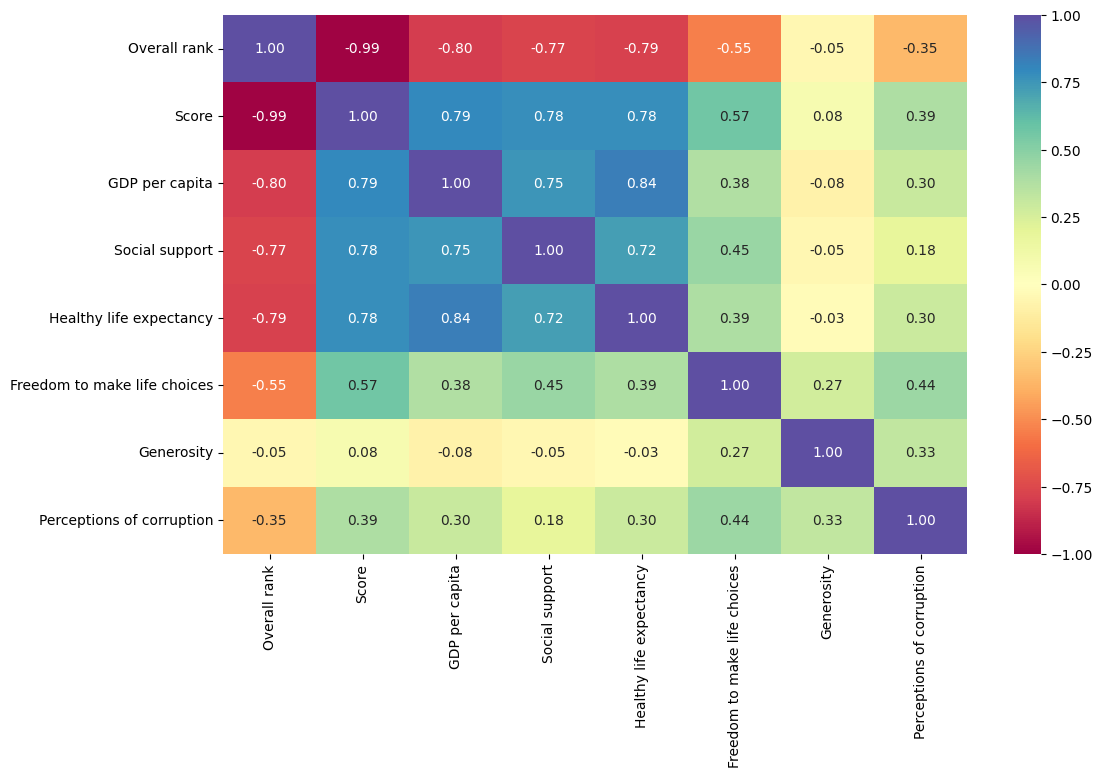

In [157]:
#Correlation Matrix for 2019 data

cols_list = df_2019.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df_2019[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Negative correlations for the 2019 data:**
* Overall rank negatively correlates with -0.50 and above with Score (-0.99), GDP per capita (-0.80), Social support (-0.77), Healthy life expectancy (-0.79), and Freedom to make life choices (-0.55).

**Positive correlations for the 2019 data:**
* Score positively correlates with 0.50 and above with GDP per capita (0.79), Social support (0.78), Healthy life expectancy (0.78), and Freedom to make life choices (0.57). 
* GDP per capita correlates with 0.50 and above with Social support (0.75), and Healthy life expectancy (0.84).
* Social support correlates with 0.50 and above with Healthy life expectancy (0.72).

**Comparison between 2018 and 2019 correlations:**
Both years have identified the same negative and positive correlations with slight variation. 

In [158]:
df_report_2018_2019.head()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [159]:
#Describe
df_report_2018_2019.describe()

,Overall rank,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,78.500000,2018.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.182926,0.111526
std,45.104737,0.500803,1.114631,0.394592,0.300310,0.252724,0.156024,0.096739,0.095296
min,1.000000,2018.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,2018.000000,4.514250,0.609500,1.055750,0.488250,0.322500,0.108750,0.050000
50%,78.500000,2018.500000,5.379500,0.960000,1.265500,0.699000,0.449500,0.175500,0.082000
75%,117.250000,2019.000000,6.176000,1.219500,1.457500,0.858000,0.540250,0.245000,0.141250
max,156.000000,2019.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.598000,0.457000


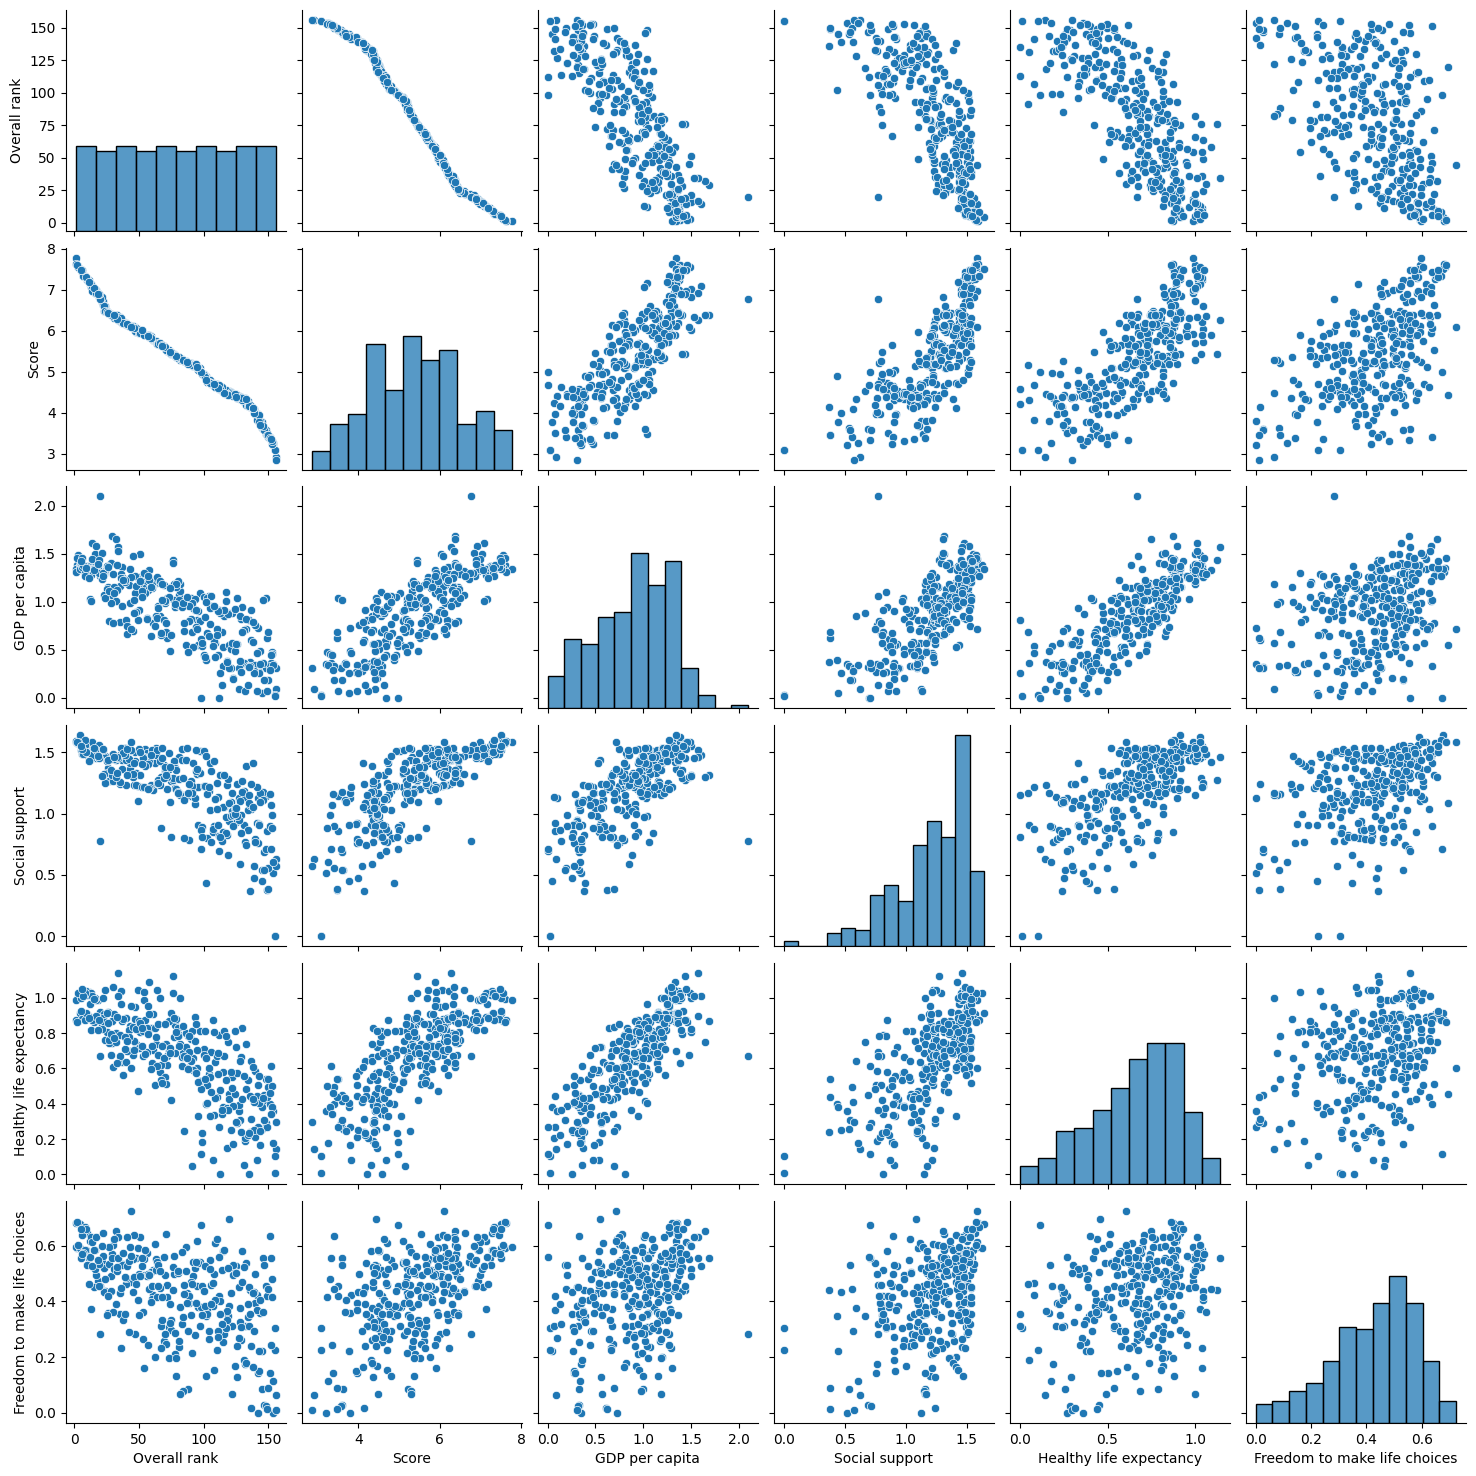

In [160]:
# Pairplot of 2018 and 2019 data including identified significant correlations

sns.pairplot(data=df_report_2018_2019,vars=['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices'])
plt.show()

In [161]:
# Identify duplicates for 'Country or region'

duplicate = df_report_2018_2019[df_report_2018_2019.duplicated(subset='Country or region')]
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
5,84,Algeria,2018,5.295,0.979,1.154,0.687,0.077,0.055,0.135
8,29,Argentina,2018,6.388,1.073,1.468,0.744,0.570,0.062,0.054
10,129,Armenia,2018,4.321,0.816,0.990,0.666,0.260,0.077,0.028
...,...,...,...,...,...,...,...,...,...,...
303,102,Venezuela,2018,4.806,0.996,1.469,0.657,0.133,0.056,0.052
305,95,Vietnam,2018,5.103,0.715,1.365,0.702,0.618,0.177,0.079
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082


There are 152 duplicates for 'Country or region'. As a result, when identifying the top 10 countries via 'Score', the mean will be used.

In [162]:
# Score of each country or region

happiness = df_report_2018_2019.groupby('Country or region')[['Score']].mean().sort_values('Score').tail(10)
happiness

,Score
Country or region,
Australia,7.2500
Canada,7.3030
New Zealand,7.3155
Sweden,7.3285
Netherlands,7.4645
Switzerland,7.4835
Iceland,7.4945
Norway,7.5740
Denmark,7.5775


<Axes: xlabel='Country or region'>

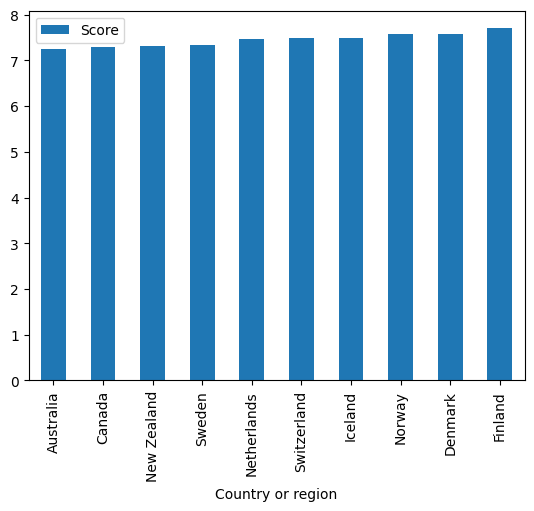

In [163]:
# Visualizaiton of top 10 happiest countries

happiness.plot(kind='bar')

The happiest country by 'Score' is Finland, followed by Denmark and Norway. This is under the assumption that the higher the score number the happier the country is. 

In [164]:
# Score of each country or region

OR = df_report_2018_2019.groupby('Country or region')[['Overall rank']].mean().sort_values('Overall rank').head(10)
OR

,Overall rank
Country or region,
Finland,1.0
Norway,2.5
Denmark,2.5
Iceland,4.0
Netherlands,5.5
Switzerland,5.5
New Zealand,8.0
Sweden,8.0
Canada,8.0


<Axes: xlabel='Country or region'>

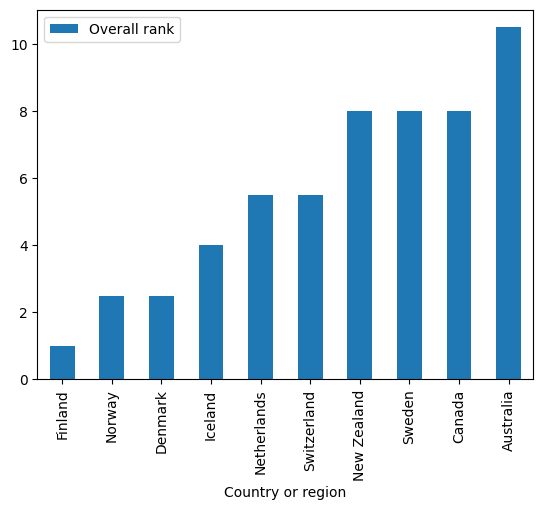

In [165]:
# Visualizaiton of top 10 Overall ranked countries

OR.plot(kind='bar')

The number one overall ranked country is Finland, followed by Norway and Denmark.

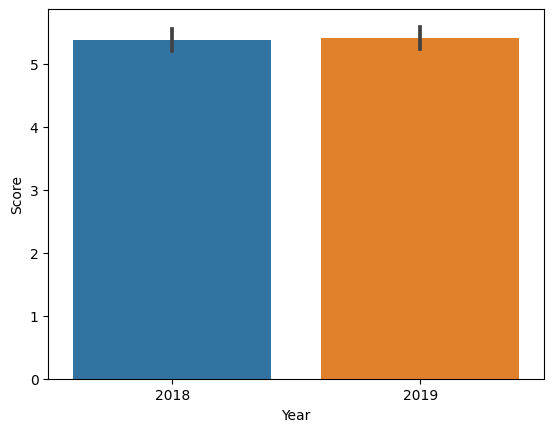

In [166]:
# Plotting 'Score' and 'Year' 
ax = sns.barplot(x = 'Year', y = 'Score', data = df_report_2018_2019)

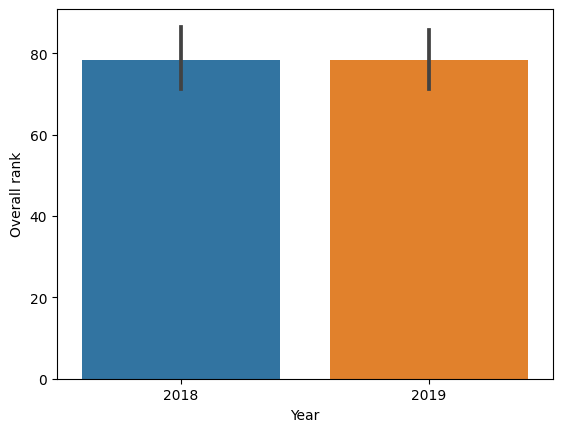

In [167]:
# Plotting 'Overall rank' and 'Year' 
ax = sns.barplot(x = 'Year', y = 'Overall rank', data = df_report_2018_2019)

There is not much change in 'Overall rank' and 'Score' from 2018 to 2019. 

**End**